## Steps invloved in creating movie recommender:
    
    1. Collect Data, here I've downloaded from kaggle "https://www.kaggle.com/prajitdatta/movielens-100k-dataset"
    2. Import all the required libray
    3. Read the data uisng pandas
    4. Here the data is in two files, so merge the relevant data
    5. Study the data (Understanding data)
    6. Preform EDA
    7. Create pivot table to better insights about data
    8. Create similarity matrix to find the correlation (club similar entity)
    9. Create Correlation between them and use that factor for recommadation
    9. Apply threshold (condition) for recommadation.

In [76]:
import pandas as pd
import numpy as np

In [9]:
u_data_col = ['user id' , 'item id' , 'rating' , 'timestamp']
u_data=pd.read_csv("u.data",sep='\t',names=u_data_col)
u_data

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [15]:
u_item_col = ['item id' , 'movie title' , 'release date', 'video release date',
             ' IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy',
              'Film-Noir' ,'Horror' , 'Musical' ,'Mystery' , 'Romance' , 'Sci-Fi',
              'Thriller', 'War' , 'Western']
u_item=pd.read_csv('u.item',sep='|',encoding='latin-1',names=u_item_col)
u_item.head(10)

,item id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
u_data.shape

(100000, 4)

In [18]:
u_item.shape

(1682, 24)

# Merge the relevant data(data needed)

In [26]:
movie=u_item[['item id','movie title']]
movie.head(10)

,item id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [28]:
data = pd.merge(u_data,movie)
data.head(10)

,user id,item id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [29]:
data.shape

(100000, 5)

In [31]:
data.describe()

,user id,item id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [33]:
data.count()

user id        100000
item id        100000
rating         100000
timestamp      100000
movie title    100000
dtype: int64

## Exploratory Data Analysis (EDA)

In [38]:
data['movie title'].value_counts().head(10)

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: movie title, dtype: int64

In [39]:
data['movie title'].value_counts().tail(10)

Favor, The (1994)                               1
Stefano Quantestorie (1993)                     1
Aiqing wansui (1994)                            1
King of New York (1990)                         1
Yankee Zulu (1994)                              1
Wings of Courage (1995)                         1
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1
He Walked by Night (1948)                       1
Dadetown (1995)                                 1
Bird of Prey (1996)                             1
Name: movie title, dtype: int64

In [46]:
data['rating'].mean()

3.52986

In [50]:
# GroupBy

data.groupby('movie title')['rating'].mean().sort_values(ascending=False).head(5)

movie title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [53]:
#calculating mean rating

rating = pd.DataFrame(data.groupby('movie title')['rating'].mean())
rating.head(10)

,rating
movie title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [55]:
rating['count'] = data['movie title'].value_counts()
rating.head(10)

,rating,count
movie title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency-->')

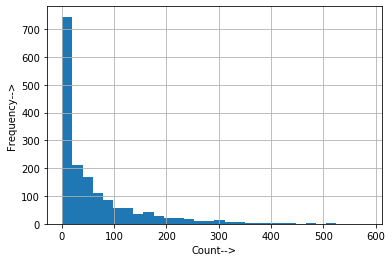

In [57]:
rating['count'].hist(bins=30)
plt.xlabel('Count-->')
plt.ylabel('Frequency-->')

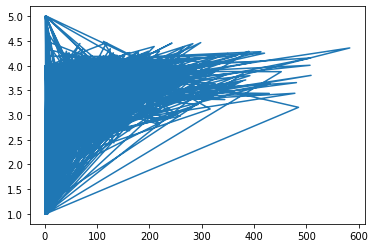

In [75]:
# line graph (but it's of no use)

plt.plot(rating['count'],rating['rating'])

In [59]:
#Pivot matrix

pivot_df = data.pivot_table(index = 'user id', columns = 'movie title', values = 'rating')
pivot_df.head(20)

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
rating.sort_values('count',ascending = False).head(10)

,rating,count
movie title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [61]:
# Find movie reccomadation for star war

sw_ratings = pivot_df['Star Wars (1977)']
sw_ratings

user id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
6      4.0
7      5.0
8      5.0
9      5.0
10     5.0
11     NaN
12     4.0
13     5.0
14     5.0
15     5.0
16     NaN
17     NaN
18     4.0
19     NaN
20     3.0
21     3.0
22     5.0
23     4.0
24     NaN
25     5.0
26     4.0
27     3.0
28     4.0
29     NaN
30     3.0
      ... 
914    NaN
915    NaN
916    5.0
917    3.0
918    NaN
919    3.0
920    NaN
921    4.0
922    5.0
923    5.0
924    5.0
925    NaN
926    NaN
927    NaN
928    NaN
929    4.0
930    2.0
931    3.0
932    NaN
933    4.0
934    5.0
935    NaN
936    4.0
937    5.0
938    5.0
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [63]:
#create similarty matrix

similarity_sw = pivot_df.corrwith(sw_ratings)
similarity_sw

movie title
'Til There Was You (1997)                                   0.872872
1-900 (1994)                                               -0.645497
101 Dalmatians (1996)                                       0.211132
12 Angry Men (1957)                                         0.184289
187 (1997)                                                  0.027398
2 Days in the Valley (1996)                                 0.066654
20,000 Leagues Under the Sea (1954)                         0.289768
2001: A Space Odyssey (1968)                                0.230884
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                        0.106453
8 1/2 (1963)                                               -0.142977
8 Heads in a Duffel Bag (1997)                             -0.577350
8 Seconds (1994)                                           -0.755929
A Chef in Love (1996)                                       0.868599
Above the Rim (1994)  

In [71]:
corr_df = pd.DataFrame(similarity_sw,columns=['correlation'])
corr_df.dropna(inplace=True)
corr_df.sort_values('correlation',ascending=False)
corr_df.head(10)


,correlation
movie title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [72]:
corr_df= corr_df.join(rating['count'])
corr_df.head(10)

,correlation,count
movie title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [74]:
corr_df[(corr_df['count']>200 )&(corr_df['correlation']>0.6) ].sort_values(by='correlation',ascending=False).head(20)

,correlation,count
movie title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
